In [42]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA (2).csv


In [43]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:',df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [44]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

## Lag 1

In [45]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [46]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 2s 100ms/step - loss: 0.0656
Epoch 2/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0151
Epoch 3/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0124
Epoch 4/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0127
Epoch 5/100
24/24 [==============================] - 3s 111ms/step - loss: 0.0128
Epoch 6/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0120
Epoch 7/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0108
Epoch 8/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0114
Epoch 9/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0114
Epoch 10/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0094
Epoch 11/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0100
Epoch 12/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0088
Epoch 13/100


In [47]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [48]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

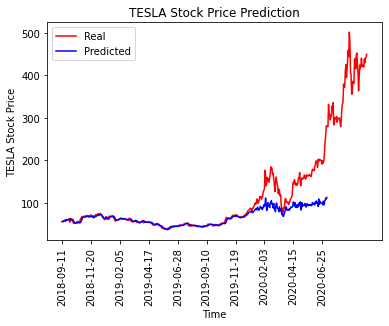

In [49]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted')#1258
plt.title('TESLA Stock Price Prediction')
plt.xticks(np.arange(0,459,50),rotation=90)#459
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag 7

In [50]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 7))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [51]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 2s 100ms/step - loss: 5.7996
Epoch 2/100
24/24 [==============================] - 3s 109ms/step - loss: 2.9146
Epoch 3/100
24/24 [==============================] - 3s 110ms/step - loss: 1.9711
Epoch 4/100
24/24 [==============================] - 3s 111ms/step - loss: 0.8079
Epoch 5/100
24/24 [==============================] - 3s 110ms/step - loss: 0.7048
Epoch 6/100
24/24 [==============================] - 3s 110ms/step - loss: 0.5731
Epoch 7/100
24/24 [==============================] - 3s 109ms/step - loss: 0.5504
Epoch 8/100
24/24 [==============================] - 3s 109ms/step - loss: 0.4314
Epoch 9/100
24/24 [==============================] - 3s 110ms/step - loss: 0.4695
Epoch 10/100
24/24 [==============================] - 3s 110ms/step - loss: 0.4733
Epoch 11/100
24/24 [==============================] - 3s 110ms/step - loss: 0.4215
Epoch 12/100
24/24 [==============================] - 3s 109ms/step - loss: 0.4086
Epoch 13/100


In [52]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [53]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

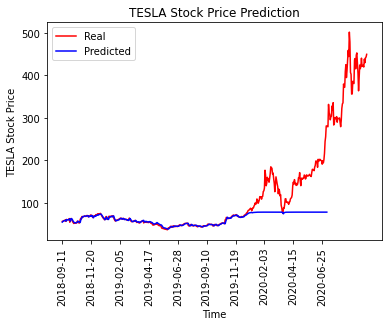

In [54]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted')#1258
plt.title('TESLA Stock Price Prediction')
plt.xticks(np.arange(0,459,50),rotation=90)#459
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag 14

In [55]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 14))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [56]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 2s 103ms/step - loss: 31.8489
Epoch 2/100
24/24 [==============================] - 3s 111ms/step - loss: 11.8414
Epoch 3/100
24/24 [==============================] - 3s 110ms/step - loss: 11.8655
Epoch 4/100
24/24 [==============================] - 3s 110ms/step - loss: 11.8898
Epoch 5/100
24/24 [==============================] - 3s 111ms/step - loss: 11.5433
Epoch 6/100
24/24 [==============================] - 3s 111ms/step - loss: 5.4813
Epoch 7/100
24/24 [==============================] - 3s 110ms/step - loss: 2.6417
Epoch 8/100
24/24 [==============================] - 3s 109ms/step - loss: 2.0125
Epoch 9/100
24/24 [==============================] - 3s 110ms/step - loss: 1.9184
Epoch 10/100
24/24 [==============================] - 3s 110ms/step - loss: 1.8453
Epoch 11/100
24/24 [==============================] - 3s 110ms/step - loss: 1.8795
Epoch 12/100
24/24 [==============================] - 3s 109ms/step - loss: 1.8151
Epoch 13

In [57]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [58]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

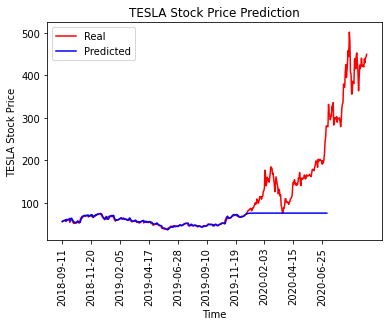

In [59]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted')#1258
plt.title('TESLA Stock Price Prediction')
plt.xticks(np.arange(0,459,50),rotation=90)#459
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Make comparison between different settings


*   Comparison between 4 hidden layers and 6 hidden layers
*   Comparison between different dropout rates (0.2 vs 0.5).



### First let's compare the result of different hidden layers
#### If we keep all other settings to be the same, the model with 4 hidden layers are shown above, then let's get the model with 6 hidden layers.

In [60]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [61]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 4s 152ms/step - loss: 0.0837
Epoch 2/100
24/24 [==============================] - 4s 166ms/step - loss: 0.0226
Epoch 3/100
24/24 [==============================] - 4s 165ms/step - loss: 0.0187
Epoch 4/100
24/24 [==============================] - 4s 166ms/step - loss: 0.0159
Epoch 5/100
24/24 [==============================] - 4s 166ms/step - loss: 0.0157
Epoch 6/100
24/24 [==============================] - 4s 168ms/step - loss: 0.0143
Epoch 7/100
24/24 [==============================] - 4s 166ms/step - loss: 0.0148
Epoch 8/100
24/24 [==============================] - 4s 168ms/step - loss: 0.0134
Epoch 9/100
24/24 [==============================] - 4s 168ms/step - loss: 0.0136
Epoch 10/100
24/24 [==============================] - 4s 167ms/step - loss: 0.0126
Epoch 11/100
24/24 [==============================] - 4s 167ms/step - loss: 0.0122
Epoch 12/100
24/24 [==============================] - 4s 167ms/step - loss: 0.0131
Epoch 13/100


In [62]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [63]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

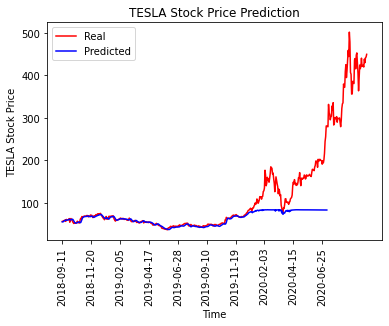

In [64]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted')#1258
plt.title('TESLA Stock Price Prediction')
plt.xticks(np.arange(0,459,50),rotation=90)
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

### Then let's compare the result of different dropout rates (0.2 vs 0.5).
#### Also, like before, we need to keep all other settings the same.

In [65]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [66]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 2s 101ms/step - loss: 0.0895
Epoch 2/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0230
Epoch 3/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0225
Epoch 4/100
24/24 [==============================] - 3s 111ms/step - loss: 0.0194
Epoch 5/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0184
Epoch 6/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0217
Epoch 7/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0198
Epoch 8/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0192
Epoch 9/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0183
Epoch 10/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0166
Epoch 11/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0177
Epoch 12/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0159
Epoch 13/100


In [67]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [68]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

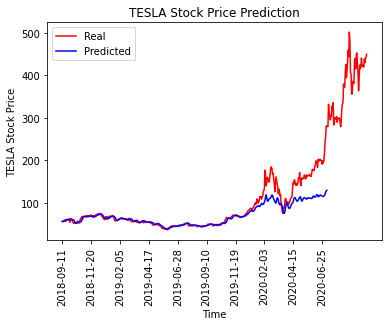

In [69]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted')#1258
plt.title('TESLA Stock Price Prediction')
plt.xticks(np.arange(0,459,50),rotation=90)
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()